Read Data
Selecting features =  40
Training 
accuracy =  0.530761730957
Selecting features =  60
Training 
accuracy =  0.532886677833
Selecting features =  80
Training 
accuracy =  0.532386690333
Selecting features =  88
Training 
accuracy =  0.533336666583


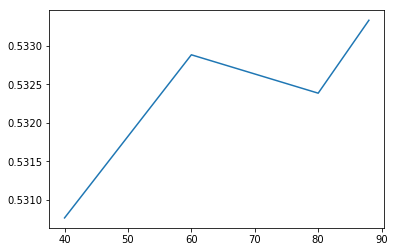

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("train.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validation.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)


k = [40,60,80,88]
maX = 0
accuracy = []
for i in range(len(k)):
    print("Selecting features = ", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    #beta = [0.0000001, 0.0001, 0.1, 1, 1000]
    
    #for j in range(len(beta)):
    print("Training ")
    clf = GaussianNB()
    clf.fit(n_trainX_new, trainLabel)
    # compute accuracy
    result = clf.score(n_testX_new, testLabel)
    print("accuracy = ", result)
    accuracy.append(result)
#         if (result > maX):
#             maX = result
#             print("Predict and write to file")
#             answer = clf.predict(n_testdata_new)
#             numpy.savetxt('result.csv', answer, delimiter=',', fmt='%d')
    
plt.plot(k, accuracy)
plt.show()

